In [1]:
#!pip install imageio

 # 🎓 Задание: «Работа с изображением как с NumPy-массивом»

> **Цель**: Отработать ключевые операции NumPy — срезы, слои, broadcasting, транслирование — на реальном примере изображения.  
> **Ограничение**: Использовать `matplotlib.pyplot` только для команды `plt.imshow()` — чтобы показать результат.

## 📥1: Загрузите изображение

### Задание 1.1: Загрузите изображение

Используйте любое цветное изображение на свое усмотрение.  
Загрузите его в массив NumPy двуся способами с  `imageio` (рекомендовано) и  `PIL`.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Вариант 1: через imageio (рекомендуется)
import imageio.v3 as iio
img = iio.imread('Machinarium.jpg')

print("Форма изображения:", img.shape)  # прооверьте

Форма изображения: (1242, 2208, 3)


In [3]:
# Вариант 2: через PIL
from PIL import Image
img_PIL = np.array(Image.open('Machinarium.jpg'))

print("Форма изображения:", img_PIL.shape)  # прооверьте

Форма изображения: (1242, 2208, 3)


## ✂️ 2: Срезы и слои (оси)

### Задание 2.1: Выведите отдельные цветовые каналы

- Создайте три новых массива: только красный канал, только зелёный, только синий.
- Покажите каждый канал как отдельное изображение (остальные каналы = 0).

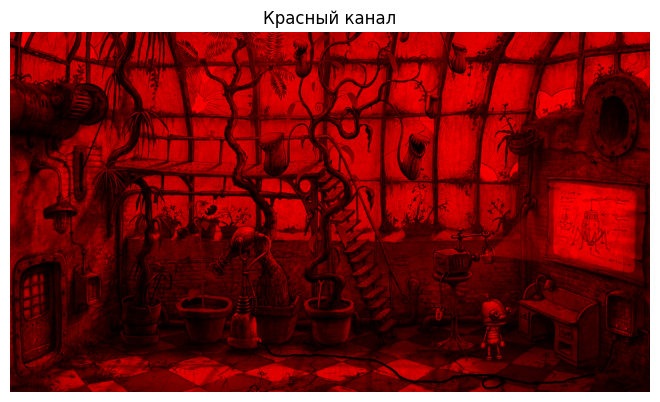

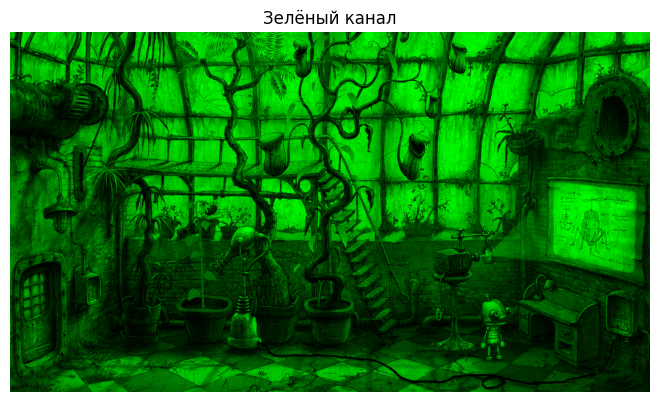

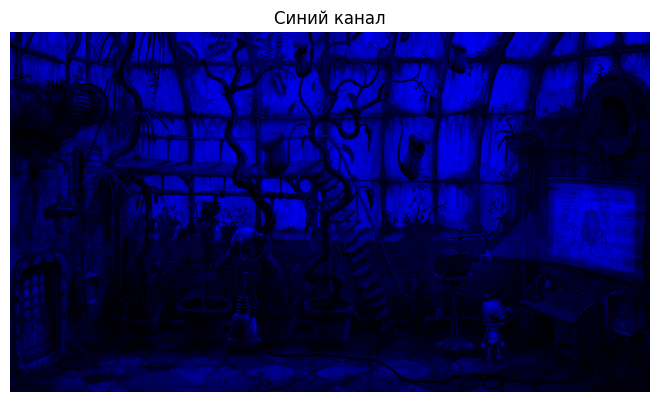

In [4]:
def showImg(img, title):
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.show()

def showOneChannel(channel, title):
    channel_img = img.copy()
    channel_img[:, :, (channel + 1) % 3] = 0  # обнуляем зелёный
    channel_img[:, :, (channel + 2) % 3] = 0  # обнуляем синий
    showImg(channel_img, title)

showOneChannel(0, "Красный канал")
showOneChannel(1, "Зелёный канал")
showOneChannel(2, "Синий канал")

### 🖼️  3: Работа с чёрно-белым изображением

### Задание 3.1: Преобразуйте цветное изображение в чёрно-белое

- Используйте формулу среднего весового
- Преобразуйте в тип `uint8` и покажите

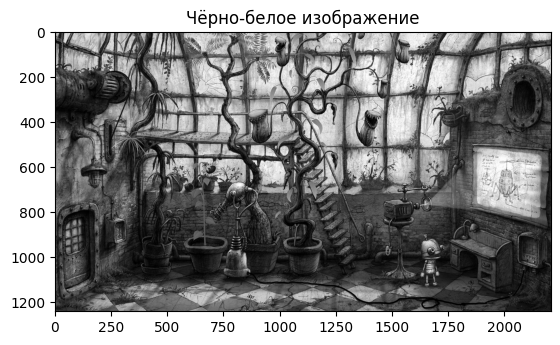

In [5]:
gray = 0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2]
gray = gray.astype(np.uint8)
plt.imshow(gray, cmap='gray')
plt.title("Чёрно-белое изображение")
plt.show()

## 🧮  4: Сжатие (уменьшение разрешения)

### Задание 4.1: Уменьшите изображение в 2 раза по каждой оси

- Используйте срезы с шагом: `img[::2, ::2]`
- Это простейший способ "даунсэмплинга".

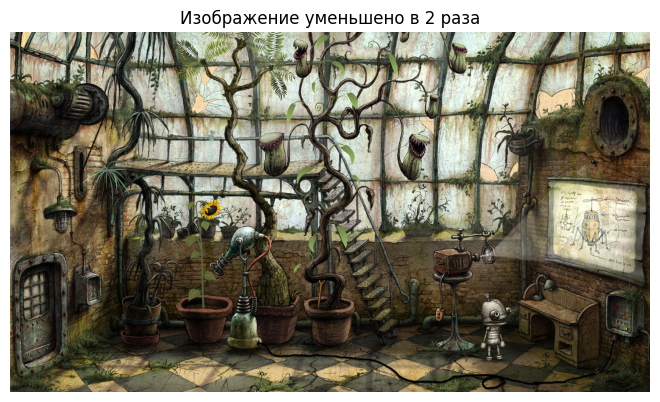

In [6]:
small_img = img[::2, ::2]
showImg(small_img, "Изображение уменьшено в 2 раза")

## 🚫 5: Затирание (зануление) поля на изображении

### Задание 5.1: Затрите прямоугольную область на изображении

- Выберите координаты прямоугольника .
- Присвойте всем пикселям в этом участке значение `[0, 0, 0]` (чёрный).


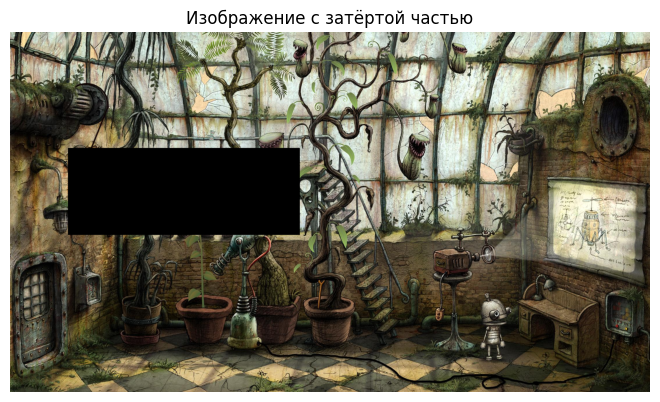

In [7]:
rect_img = img.copy()
leftX = 200
leftY = 400
rightX = 1000
rightY = 700
for x in range(leftX, rightX, 1):
    for y in range(leftY, rightY, 1):
        rect_img[y, x] = [0, 0, 0] # чёрный
showImg(rect_img, "Изображение с затёртой частью")

## 🔁 6: Перевороты изображения

### Задание 6.1: Горизонтальный переворот

- Используйте `np.flip()` и индексацию [:, ::-1]:

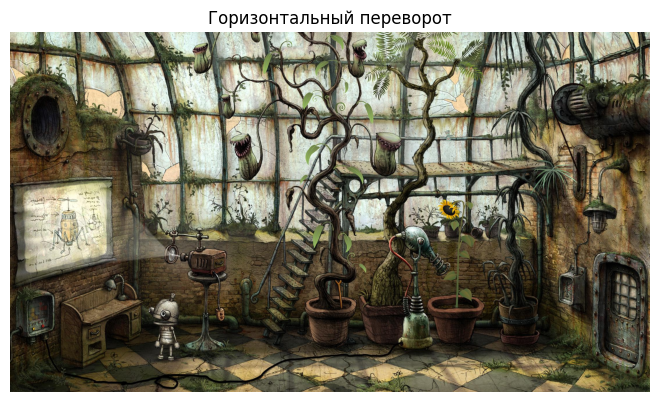

In [8]:
flipped_horizontal = np.flip(img, axis=1)  # и img[:, ::-1]
showImg(flipped_horizontal, "Горизонтальный переворот")

### Задание 6.2: Вертикальный переворот

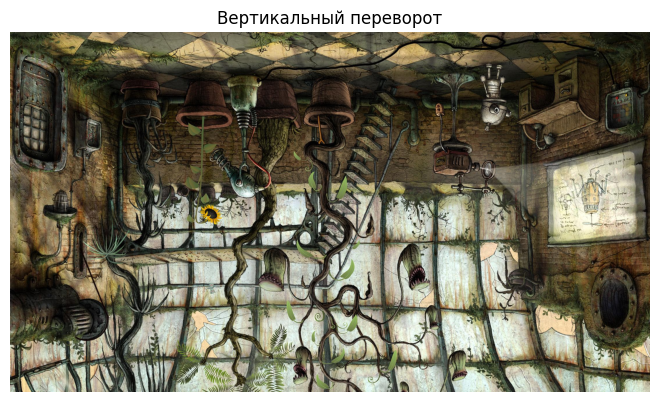

In [9]:
flipped_vertical = img[::-1, :] # и np.flip(img, axis=0)
showImg(flipped_vertical, "Вертикальный переворот")

### Задание 6.3: Полный поворот на 180°

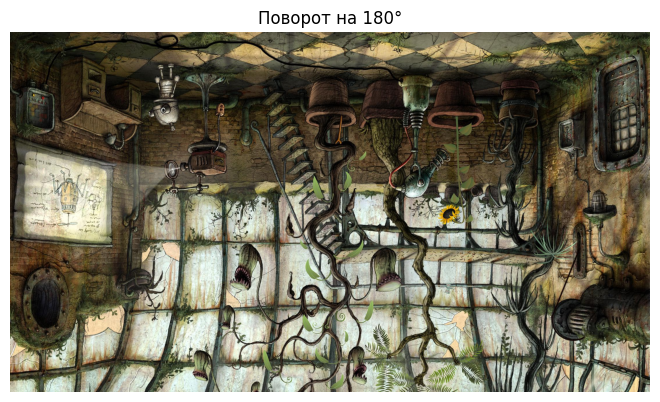

In [10]:
# rotated_180 = np.flip(img, axis=0)  # сначала вертикально
# rotated_180 = np.flip(rotated_180, axis=1)  # потом горизонтально
# эквивалентно строке ниже
rotated_180 = np.flip(img, axis=(0, 1))
showImg(rotated_180, "Поворот на 180°")

## 🔄 7: Broadcasting — наложение маски / фильтра

### Задание 7.1: Сделайте изображение “теплее” — увеличьте красный канал на 50

- Создайте массив `filter = np.array([50, 0, 0])`.
- Сложите его с изображением: `img_warmer = img + filter`.
- Ограничьте значения от 0 до 255 с помощью np.clip.

Проведите собственные модификации фото: сделайте изображенее "холоднее",  увеличьте контрастность, измените яркость в обе стороны .

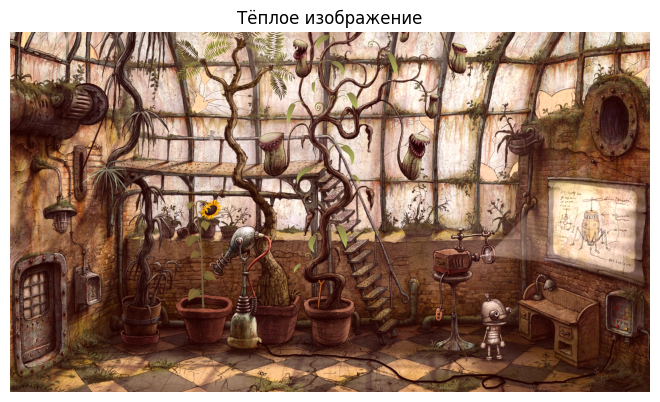

In [11]:
filter_warmer = np.array([30, 0, 0])
img_warmer = img + filter_warmer
img_warmer = np.clip(img_warmer, 0, 255).astype(np.uint8)
showImg(img_warmer, "Тёплое изображение")

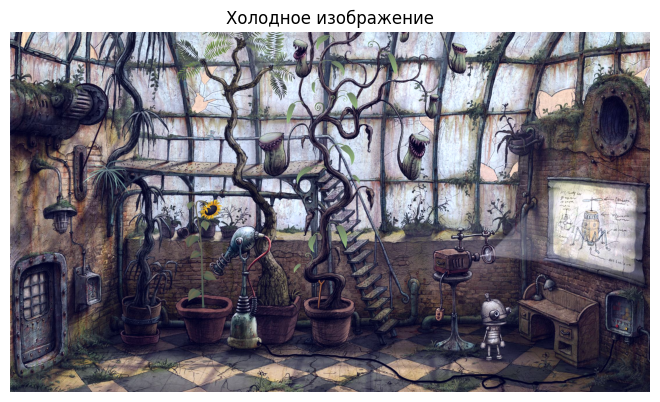

In [12]:
filter_cooler = np.array([0, 0, 30])  # уменьшаем красный, добавляем синий
img_cooler = np.clip(img + filter_cooler, 0, 255).astype(np.uint8)
showImg(img_cooler, "Холодное изображение")

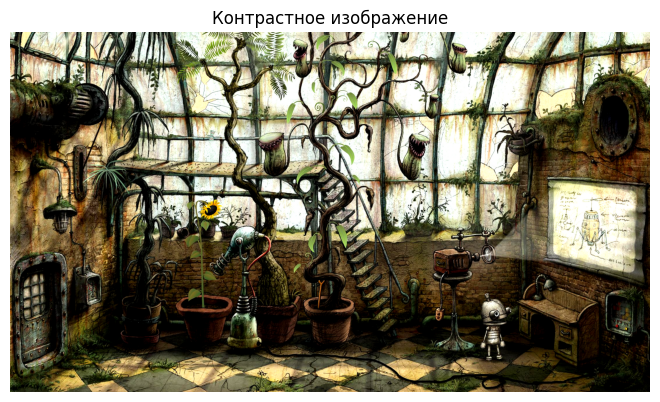

In [13]:
def add_contrast_filter(img: np.ndarray, correction: int) -> np.ndarray:
    """
    Аналог C++ функции AddContrastFilter.
    Работает только с numpy, без OpenCV.
    
    :param img: numpy.ndarray формы (H, W, 3), dtype=np.uint8
    :param correction: процент коррекции контраста (+увеличить, -уменьшить)
    :return: новое изображение numpy.ndarray
    """
    if img.dtype != np.uint8:
        raise ValueError("Ожидается изображение типа uint8")

    # Размер палитры
    L = 256

    # Находим среднюю яркость (аналог lAB)
    # формула: 0.299R + 0.587G + 0.114B
    brightness = 0.299 * img[:, :, 2] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 0]
    lAB = np.mean(brightness)

    # Коэффициент коррекции
    k = 1.0 + correction / 100.0

    # Палитра преобразования (b[L])
    b = np.zeros(L, dtype=np.uint8)
    for i in range(L):
        delta = i - lAB
        temp = lAB + k * delta
        temp = np.clip(temp, 0, 255)
        b[i] = np.uint8(temp)

    # Применяем палитру ко всем каналам
    img_out = b[img]

    return img_out


# Увеличиваем контраст
contrast_img = add_contrast_filter(img, 40)
showImg(contrast_img, "Контрастное изображение")

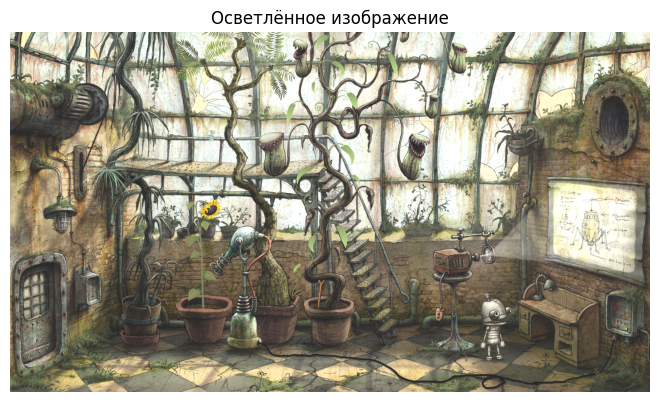

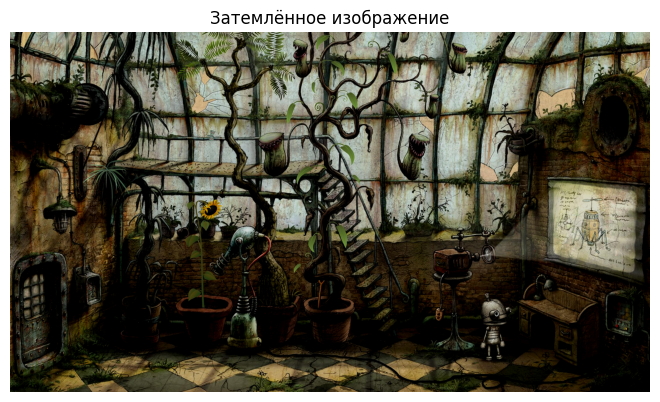

In [14]:
brightness_up = 40
brightness_down = -40

brighter_img = np.clip(img, 0, 255 - brightness_up).astype(np.uint8) + brightness_up
darker_img = np.clip(img + brightness_down, 0, 255).astype(np.uint8)
showImg(brighter_img, "Осветлённое изображение")
showImg(darker_img, "Затемлённое изображение")

## 🎭  8: Транслирование — объединение с другим изображением

### Задание 8.1: Создайте градиентную маску и наложите её

- Создайте массив формы `(H, W, 1)` — например, линейный градиент по высоте.
- Смешайте исходное изображение с инвертированным, используя градиент как вес.

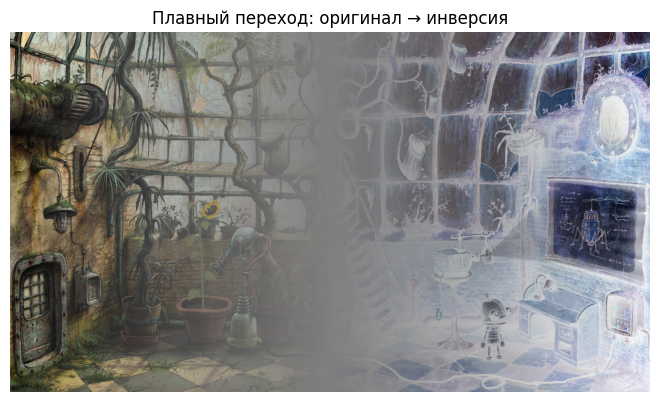

In [15]:
H, W = img.shape[:2]
gradient = np.linspace(0, 1, W)[None, :, None]  # (H, 1, 1)

inverted = 255 - img
blended = (img * (1 - gradient) + inverted * gradient).astype(np.uint8)
showImg(blended, "Плавный переход: оригинал → инверсия")

# 🎓 Задание: «Реализация kNN — сравнение чистого Python и NumPy»

> **Цель**: Проанализировать разницу между поэлементными циклами и векторизованными операциями.  
> **Задача**: Реализовать алгоритм k ближайших соседей двумя способами — без библиотек и с NumPy — и сравнить время выполнения.


## 🧪 Шаг 1: Подготовьте данные

Создайте небольшой набор данных вручную:

In [16]:
def generateInputData(n, k):
    np.random.seed(42)
    # Обучающая выборка: 1000 точек в 3D-пространстве
    X_train = np.random.rand(n, 3) * 100  # координаты от 0 до 100
    y_train = np.random.choice(['A', 'B', 'C'], size=n)  # метки классов
    
    # Точка, которую нужно классифицировать
    X_test = np.array([50.0, 50.0, 50.0])
    return X_train, y_train, X_test, int(min(k, n))

X_train, y_train, X_test, k = generateInputData(1000, 7)

## ⚙️ Шаг 2: Реализация на чистом Python (без NumPy)

Напишите функцию `knn_pure_python`, которая:

- Принимает `X_train`, `y_train`, `X_test`, `k`.
- Для каждой точки в `X_train` вычисляет евклидово расстояние до `X_test` через цикл.
- Сортирует расстояния.
- Берёт `k` ближайших соседей.
- Возвращает самый частый класс.

In [17]:
from collections import Counter

def knnPurePython(X_train, y_train, X_test, k):
    distances = []
    for i, x in enumerate(X_train):
        # Евклидово расстояние
        dist = ((x[0] - X_test[0])**2 +
                (x[1] - X_test[1])**2 +
                (x[2] - X_test[2])**2) ** 0.5
        distances.append((dist, y_train[i]))

    # Сортировка по расстоянию
    distances.sort(key=lambda x: x[0])

    # Берем k ближайших
    neighbors = [label for _, label in distances[:k]]

    # Находим наиболее частый класс
    most_common = Counter(neighbors).most_common(1)[0][0]
    return most_common

knnPurePython(X_train.tolist(), y_train.tolist(), X_test.tolist(), k)

'A'

## 🚀 Шаг 3: Реализация с NumPy

Напишите функцию `knn_numpy`, которая:

- Использует **векторизованные операции**.
- Вычисляет расстояния **без циклов** — через `np.linalg.norm` или `(X_train - X_test)**2`.
- Сортирует через `np.argsort`.
- Использует `np.unique(..., return_counts=True)` для подсчёта голосов.

In [18]:
def knnNumpy(X_train, y_train, X_test, k):
    # Векторизованное вычисление расстояний
    distances = np.linalg.norm(X_train - X_test, axis=1)
    
    # Индексы сортировки
    sorted_indices = np.argsort(distances)
    
    # k ближайших
    nearest_labels = y_train[sorted_indices[:k]]
    
    # Подсчет наиболее частого класса
    unique, counts = np.unique(nearest_labels, return_counts=True)
    return unique[np.argmax(counts)]

knnNumpy(X_train, y_train, X_test, k)

'A'

## 📊 Шаг 4: Сравнение и анализ

проведите анализ, полученных результатов. чувстителен ли алгоритм к количеству соседей??

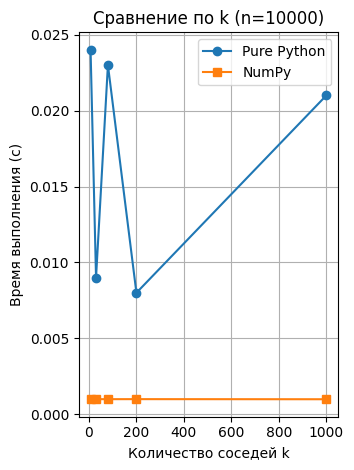

In [19]:
import time

fixed_n = 10_000
ks = [7, 30, 80, 200, 1000]

# --- Времена по k ---
time_pure_k = []
time_np_k = []

X_train, y_train, X_test, k = generateInputData(fixed_n, ks[0])

for k_val in ks:
    X_train, y_train, X_test, k = generateInputData(fixed_n, k_val)
    X_train_list, y_train_list, X_test_list = X_train.tolist(), y_train.tolist(), X_test.tolist()
    
    start = time.time()
    knnPurePython(X_train_list, y_train_list, X_test_list, k)
    t1 = time.time() - start

    start = time.time()
    knnNumpy(X_train, y_train, X_test, k)
    t2 = time.time() - start

    time_pure_k.append(t1)
    time_np_k.append(t2)

# --- График по k ---
plt.subplot(1,2,2)
plt.plot(ks, time_pure_k, 'o-', label='Pure Python')
plt.plot(ks, time_np_k, 's-', label='NumPy')
plt.xlabel("Количество соседей k")
plt.ylabel("Время выполнения (с)")
plt.title(f"Сравнение по k (n={fixed_n})")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 📈 Шаг 5 : Масштабирование

Увеличьте размер выборки до 10 000 и 100 000 точек — и посмотрите, как растёт разница во времени.

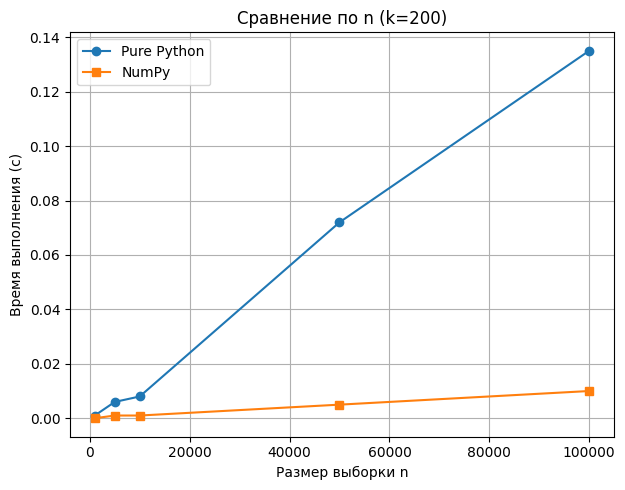

In [25]:
# --- Параметры ---
ns = [1000, 5000, 10_000, 50_000, 100_000]
fixed_k = 200

# --- Времена по n ---
time_pure_n = []
time_np_n = []

for n in ns:
    X_train, y_train, X_test, k = generateInputData(n, fixed_k)
    X_train_list, y_train_list, X_test_list = X_train.tolist(), y_train.tolist(), X_test.tolist()
    
    start = time.time()
    knnPurePython(X_train_list, y_train_list, X_test_list, k)
    t1 = time.time() - start

    start = time.time()
    knnNumpy(X_train, y_train, X_test, k)
    t2 = time.time() - start

    time_pure_n.append(t1)
    time_np_n.append(t2)

# --- График по n ---
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(ns, time_pure_n, 'o-', label='Pure Python')
plt.plot(ns, time_np_n, 's-', label='NumPy')
plt.xlabel("Размер выборки n")
plt.ylabel("Время выполнения (с)")
plt.title(f"Сравнение по n (k={fixed_k})")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [26]:
size(float)

NameError: name 'size' is not defined